In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
table = pd.read_csv("gs://nflis_data/MCM_NFLIS_Data.csv")

In [5]:
table.head()

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,2010,VA,ACCOMACK,51,1,51001,Propoxyphene,1,84,41462
1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
2,2010,PA,ADAMS,42,1,42001,Methadone,2,334,89981
3,2010,VA,ALEXANDRIA CITY,51,510,51510,Heroin,5,427,41462
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,8500,89981


In [6]:
fips_set = set(table['FIPS_Combined'].tolist())
# dict to calculate the total drug reports in each county
fips_dict = {}
for fip in fips_set:
    fips_dict[fip] = 0

In [7]:
for fip in fips_dict:
    df_fip = table[table.FIPS_Combined == fip]
    df_fip = df_fip[df_fip.YYYY <= 2015]
    df_fip = df_fip[df_fip.YYYY >= 2010]
    s = set()
    s = list(set(df_fip['TotalDrugReportsCounty']))
    total = sum(s)
    fips_dict[fip] = total

In [8]:
# conver the dict to list. (fips, num_of_reports)
fips_dict = sorted(fips_dict.items(), key=lambda item: item[1], reverse=True)

drug_name = set(table['SubstanceName'].tolist())
drug_name = list(drug_name)

In [9]:
fips_dict[:10]

[(42101, 146506),
 (39035, 73728),
 (39061, 72747),
 (42003, 51509),
 (39113, 49787),
 (39049, 41053),
 (21111, 30405),
 (42045, 29726),
 (42017, 26408),
 (42133, 21655)]

In [10]:
print(drug_name)

['Pethidine', 'U-51754', 'Opiates', 'MT-45', 'Heroin', 'Acetyl fentanyl', 'Hydromorphone', 'Cyclopentyl fentanyl', 'Acryl fentanyl', 'Acetyldihydrocodeine', 'trans-3-Methylfentanyl', 'Methadone', 'Oxymorphone', 'Levorphanol', 'Fluoroisobutyryl fentanyl', 'Carfentanil', 'Butorphanol', 'U-48800', 'Meperidine', 'Desmethylprodine ', 'p-Fluorofentanyl', 'Codeine', 'Buprenorphine', 'Opium', 'o-Fluorofentanyl', 'Methoxyacetyl fentanyl', 'Metazocine', 'Mitragynine', 'Tetrahydrofuran fentanyl', 'Hydrocodeinone', 'p-Fluorobutyryl fentanyl', 'Oxycodone', '3-Fluorofentanyl', 'Dihydrocodeine', 'Isobutyryl fentanyl', 'Benzylfentanyl', 'U-49900', 'Morphine', 'Nalbuphine', 'Cyclopropyl fentanyl', 'Furanyl fentanyl', 'Acetylcodeine', '4-Fluoroisobutyryl fentanyl', 'Fluorobutyryl fentanyl ', 'p-methoxybutyryl fentanyl', 'Hydrocodone', 'Crotonyl fentanyl', 'Fentanyl', 'Valeryl fentanyl', 'Thebaine', 'Propoxyphene', 'Butyryl fentanyl', 'Tramadol', 'Cyclopropyl/Crotonyl Fentanyl', '3,4-Methylenedioxy U-477

In [11]:
def get_data_from_FIPS_combined(fips, drug_num=5):
    df = table[table.FIPS_Combined == fips]
    df = df[df.YYYY <= 2015]
    df_dict = {}
    for name in drug_name:
        df_drug = df[df.SubstanceName == name]
        df_dict[name] = sum(df_drug['DrugReports'])
    df_dict = sorted(df_dict.items(), key=lambda item: item[1], reverse=True)
    df_list = []
    drug_names = []
    # We consider top 5 drugs by default
    for i in range(drug_num): 
        name = df_dict[i][0]
        drug_names.append(name)
#         print(name)
        df_with_substance = df[df.SubstanceName == name]
        report_num = list(df_with_substance['DrugReports'])
        while len(report_num) <  6:
            report_num.insert(0,0)
        df_list.append(report_num)
    return df_list, drug_names

In [12]:
get_data_from_FIPS_combined(fips=39061,drug_num=5)

([[1917, 2248, 3291, 3458, 3686, 4167],
  [1016, 324, 305, 269, 230, 250],
  [0, 11, 4, 5, 189, 1434],
  [347, 168, 126, 109, 104, 88],
  [106, 55, 41, 75, 78, 79]],
 ['Heroin', 'Oxycodone', 'Fentanyl', 'Hydrocodone', 'Buprenorphine'])

In [13]:
from sklearn import linear_model
import numpy as np
model = linear_model.LinearRegression()
X = [[2010], [2011], [2012], [2013], [2014], [2015]]
X_new = [[2010], [2011], [2012], [2013], [2014], [2015], [2016], [2017]]

def linear_regression(df_list):
    df_pred_list = []
    for data in df_list:
        model.fit(X,data)
        pred = model.predict(X_new)
        df_pred_list.append(list(pred))
    return df_pred_list

In [14]:
# print(linear_regression(get_data_from_FIPS_combined(39061)))

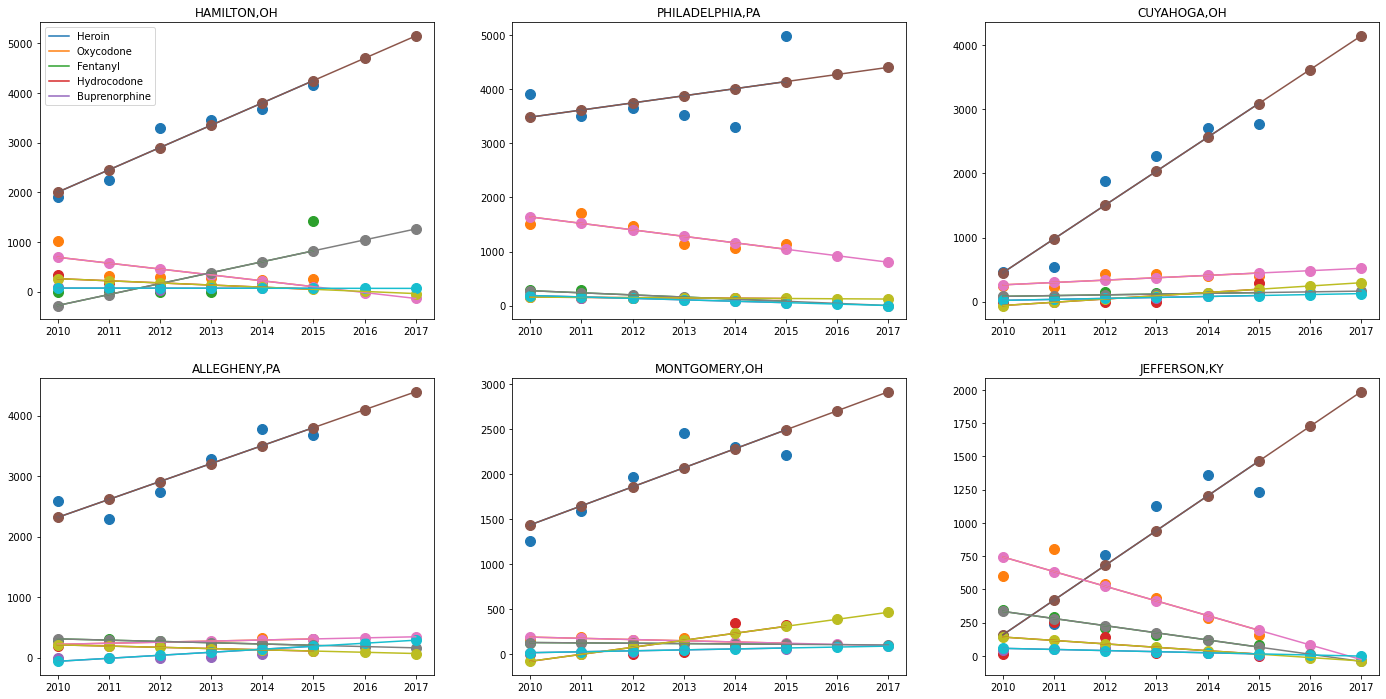

In [41]:
f = 39061
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
year = [2010,2011,2012,2013,2014,2015]
plt.figure(figsize=(24, 12))
plt.legend(drug_names)
plt.subplot(2, 3, 1)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
    plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)
    

f = 42101
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
# year = [2010,2011,2012,2013,2014,2015]
plt.subplot(2, 3, 2)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
#     plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
# year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)

f = 39035
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
# year = [2010,2011,2012,2013,2014,2015]
plt.subplot(2, 3, 3)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
#     plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
# year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)

f = 42003
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
# year = [2010,2011,2012,2013,2014,2015]
plt.subplot(2, 3, 4)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
#     plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
# year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)
    
f = 39113
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
# year = [2010,2011,2012,2013,2014,2015]
plt.subplot(2, 3, 5)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
#     plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
# year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)

f = 21111
county_name = table.loc[table.FIPS_Combined==f,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==f,'State'].values[0]
datas, drug_names= get_data_from_FIPS_combined(fips=f)
# year = [2010,2011,2012,2013,2014,2015]
plt.subplot(2, 3, 6)
for data in datas:
    (m, b) = np.polyfit(year, data, 1)
    yp = np.polyval([m, b], year)
    plt.plot(year, yp)
    plt.grid(False)
    plt.scatter(year,data, s= 100)
#     plt.legend(drug_names)
    plt.title("{}".format(county_name))
pred_list = linear_regression(datas)
# year_pred = [2010,2011,2012,2013,2014,2015,2016,2017]
pred_drug_names = []
for data in pred_list:
    (m, b) = np.polyfit(year_pred, data, 1)
    yp = np.polyval([m, b], year_pred)
    plt.plot(year_pred, yp)
    plt.grid(False)
    plt.scatter(year_pred,data,s= 100)

In [2]:
drug_text = ["Heroin", "Oxycodone", "Buprenorphine", "Hydrocodone", "Fentanyl"]
county_text = [42101, 39035, 42003]

In [14]:
temp = table[table.FIPS_Combined == county_text[2]]
temp = temp[temp.SubstanceName == drug_text[4]]
temp

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
107,2010,PA,ALLEGHENY,42,3,42003,Fentanyl,3,8500,89981
2738,2011,PA,ALLEGHENY,42,3,42003,Fentanyl,2,8004,86793
5324,2012,PA,ALLEGHENY,42,3,42003,Fentanyl,4,8196,78577
8786,2013,PA,ALLEGHENY,42,3,42003,Fentanyl,5,8585,72096
12168,2014,PA,ALLEGHENY,42,3,42003,Fentanyl,68,9286,77318
13935,2015,PA,ALLEGHENY,42,3,42003,Fentanyl,312,8938,75351
16757,2016,PA,ALLEGHENY,42,3,42003,Fentanyl,770,9025,72376
20311,2017,PA,ALLEGHENY,42,3,42003,Fentanyl,1516,8247,68751


In [15]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
model = Ridge()
X_temp = [[0], [1], [2], [3], [4], [5]]
X_new_temp = [[0], [1], [2], [3], [4], [5], [6], [7]]
X = [[2010], [2011], [2012], [2013], [2014], [2015]]
X_new = [[2010], [2011], [2012], [2013], [2014], [2015], [2016], [2017]]

In [17]:
def linear_regression_ridge(df_list):
    df_pred_list = []
    for data in df_list:
        model.fit(X,data)
        pred = model.predict(X_new)
        df_pred_list.append(list(pred))
    return df_pred_list

In [18]:
print(linear_regression_ridge(get_data_from_FIPS_combined(42101)))

Heroin
Oxycodone
Codeine
Buprenorphine
Hydrocodone
[[3502.0540540540533, 3626.432432432426, 3750.810810810799, 3875.189189189172, 3999.567567567574, 4123.945945945947, 4248.32432432432, 4372.7027027026925], [1624.306306306331, 1511.11711711713, 1397.927927927929, 1284.738738738757, 1171.549549549556, 1058.3603603603842, 945.1711711711832, 831.9819819819822], [271.2342342342454, 234.20720720721874, 197.1801801801921, 160.15315315316548, 123.12612612613884, 86.09909909911221, 49.072072072085575, 12.045045045058941], [157.39639639639609, 152.50450450450444, 147.6126126126128, 142.72072072072115, 137.8288288288295, 132.93693693693604, 128.0450450450444, 123.15315315315274], [183.53153153153107, 158.58558558558434, 133.6396396396376, 108.69369369369088, 83.74774774774414, 58.80180180179741, 33.85585585585795, 8.909909909911221]]


In [19]:
for fips, num in fips_dict:
    print(fips)
    print(table.loc[table.FIPS_Combined==fips,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==fips,'State'].values[0])
    print(linear_regression(get_data_from_FIPS_combined(fips)))
    print('\n')

42101
PHILADELPHIA,PA
Heroin
Oxycodone
Codeine
Buprenorphine
Hydrocodone
[[3502.0540540540533, 3626.432432432426, 3750.810810810799, 3875.189189189172, 3999.567567567574, 4123.945945945947, 4248.32432432432, 4372.7027027026925], [1624.306306306331, 1511.11711711713, 1397.927927927929, 1284.738738738757, 1171.549549549556, 1058.3603603603842, 945.1711711711832, 831.9819819819822], [271.2342342342454, 234.20720720721874, 197.1801801801921, 160.15315315316548, 123.12612612613884, 86.09909909911221, 49.072072072085575, 12.045045045058941], [157.39639639639609, 152.50450450450444, 147.6126126126128, 142.72072072072115, 137.8288288288295, 132.93693693693604, 128.0450450450444, 123.15315315315274], [183.53153153153107, 158.58558558558434, 133.6396396396376, 108.69369369369088, 83.74774774774414, 58.80180180179741, 33.85585585585795, 8.909909909911221]]


39035
CUYAHOGA,OH
Heroin
Oxycodone
Hydrocodone
Fentanyl
Buprenorphine
[[525.0180180179887, 1023.4774774773978, 1521.936936936807, 2020.39639

In [20]:
for fips, num in fips_dict:
    print(fips)
    print(table.loc[table.FIPS_Combined==fips,'COUNTY'].values[0] + ',' + table.loc[table.FIPS_Combined==fips,'State'].values[0])
    print(linear_regression_ridge(get_data_from_FIPS_combined(fips)))
    print('\n')

42101
PHILADELPHIA,PA
Heroin
Oxycodone
Codeine
Buprenorphine
Hydrocodone
[[3502.0540540540533, 3626.432432432426, 3750.810810810799, 3875.189189189172, 3999.567567567574, 4123.945945945947, 4248.32432432432, 4372.7027027026925], [1624.306306306331, 1511.11711711713, 1397.927927927929, 1284.738738738757, 1171.549549549556, 1058.3603603603842, 945.1711711711832, 831.9819819819822], [271.2342342342454, 234.20720720721874, 197.1801801801921, 160.15315315316548, 123.12612612613884, 86.09909909911221, 49.072072072085575, 12.045045045058941], [157.39639639639609, 152.50450450450444, 147.6126126126128, 142.72072072072115, 137.8288288288295, 132.93693693693604, 128.0450450450444, 123.15315315315274], [183.53153153153107, 158.58558558558434, 133.6396396396376, 108.69369369369088, 83.74774774774414, 58.80180180179741, 33.85585585585795, 8.909909909911221]]


39035
CUYAHOGA,OH
Heroin
Oxycodone
Hydrocodone
Fentanyl
Buprenorphine
[[525.0180180179887, 1023.4774774773978, 1521.936936936807, 2020.39639